In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
def year_range(start,end):
    df_list=[]
    for year in range(start,end):
        df=pd.read_csv(f"data/real_data/real_{year}.csv")
        df_list.append(df)
    return pd.concat(df_list,ignore_index=True)

In [2]:
df=year_range(2013,2017)

In [3]:
df

,T,TM,tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78,1.1,7.4,16.5,186.041667


In [4]:
# which kind of ml model we have to apply
    #classification or regression

# types of regressionmodel
    #linear regression 
    #Decision tree regressor
    #random forest regressor
    #knn regressor
    #lasso regressor

In [5]:
df.isnull().sum()

T         0
TM        0
tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
#remove the nullvalue

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

T         0
TM        0
tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [9]:
#saperate the dependent and independent variable

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
#scaling

In [12]:
scaling=StandardScaler()
X=scaling.fit_transform(X)

In [13]:
df_feature=pd.DataFrame(X)

 9 feature----> important feature -feature engineering
coorelation matrix

In [14]:
df.corr()

,T,TM,tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


In [15]:
import seaborn as sns

<AxesSubplot:>

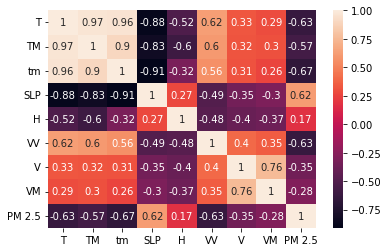

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
##feature importance
#you can get the feature importance of eachfeature of your dataset by using  a feature importance model
#it willgive you the scaore for each feature of you data thea higher the score the more important the relavent the feature is

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
model.feature_importances_

array([0.12083164, 0.08500208, 0.19099096, 0.15705133, 0.08322138,
       0.27326937, 0.05074063, 0.03889261])

<AxesSubplot:>

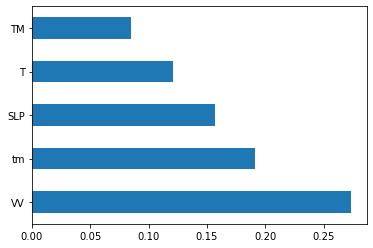

In [20]:
#plot the graph
df_feature=df.iloc[:,:-1]
feature_imp=pd.Series(model.feature_importances_,index=df_feature.columns)
feature_imp.nlargest(5).plot(kind="barh")

In [21]:
#train_test_split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_regression=LinearRegression()

In [25]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [27]:
linear_regression.score(X_test,y_test)

0.5496879505109533

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model2=DecisionTreeRegressor()

In [31]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
model2.score(X_test,y_test)

0.5859976883557164

In [33]:
model2.score(X_train,y_train)

1.0

In [38]:
from sklearn.svm import SVR 
model=SVR()

In [39]:
model.fit(X_train,y_train)

SVR()